Import the required libraries

In [52]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
stdata = pd.read_csv('StudentData.csv')

Top 5 Rows of Data

In [54]:
stdata.head()

,Student ID,Gender,Education,Infrastructure,PlacementSupport,FacultySupport,Events,Fees,Sport Facility,DegreeYears,Churn
0,7590-VHVEG,Female,Poor,Good,Poor,Poor,Poor,52885,Poor,4,No
1,5575-GNVDE,Male,Good,Poor,Good,Poor,Poor,13000,Poor,4,No
2,3668-QPYBK,Male,Good,Good,Poor,Poor,Poor,52885,Poor,4,Yes
3,7795-CFOCW,Male,Good,Poor,Good,Good,Poor,13000,Poor,4,No
4,9237-HQITU,Female,Poor,Poor,Poor,Poor,Poor,52885,Poor,4,Yes


In [55]:
stdata.shape

(7043, 11)

In [56]:
stdata.columns.values

array(['Student ID', 'Gender', 'Education', 'Infrastructure',
       'PlacementSupport', 'FacultySupport', 'Events', 'Fees',
       'Sport Facility', 'DegreeYears', 'Churn'], dtype=object)

In [57]:
# Checking the data types of all the columns
stdata.dtypes

Student ID          object
Gender              object
Education           object
Infrastructure      object
PlacementSupport    object
FacultySupport      object
Events              object
Fees                 int64
Sport Facility      object
DegreeYears          int64
Churn               object
dtype: object

In [58]:
# Check the descriptive statistics of numeric variables
stdata.describe()

,Fees,DegreeYears
count,7043.000000,7043.0
mean,28577.179469,4.0
std,21772.491378,0.0
min,4000.000000,4.0
25%,13000.000000,4.0
50%,13000.000000,4.0
75%,52885.000000,4.0
max,52885.000000,4.0


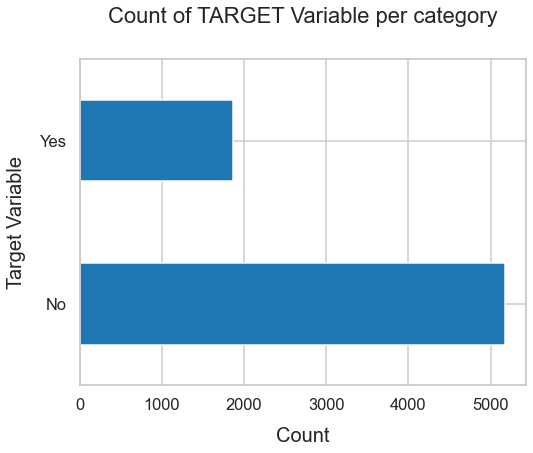

In [59]:
stdata['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [60]:
100*stdata['Churn'].value_counts()/len(stdata['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [61]:
stdata['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Data is highly imbalanced, ratio = 73:27<br>
So we analyse the data with other features while taking the target values separately to get some insights.

In [62]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
stdata.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Student ID        7043 non-null   object
 1   Gender            7043 non-null   object
 2   Education         7043 non-null   object
 3   Infrastructure    7043 non-null   object
 4   PlacementSupport  7043 non-null   object
 5   FacultySupport    7043 non-null   object
 6   Events            7043 non-null   object
 7   Fees              7043 non-null   int64 
 8   Sport Facility    7043 non-null   object
 9   DegreeYears       7043 non-null   int64 
 10  Churn             7043 non-null   object
dtypes: int64(2), object(9)
memory usage: 605.4+ KB


C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


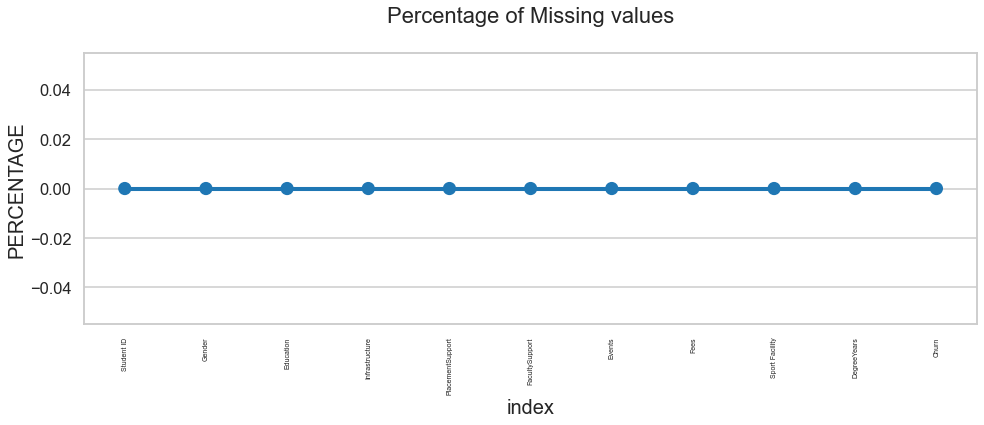

In [63]:
missing = pd.DataFrame((stdata.isnull().sum())*100/stdata.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Here, we don't have any missing data.

# Data Cleaning

In [64]:
#Data MAnipulation
sd = stdata.copy()

In [65]:
sd.Fees = pd.to_numeric(sd.Fees, errors='coerce')
sd.isnull().sum()

Student ID          0
Gender              0
Education           0
Infrastructure      0
PlacementSupport    0
FacultySupport      0
Events              0
Fees                0
Sport Facility      0
DegreeYears         0
Churn               0
dtype: int64

In [66]:
sd.loc[sd ['Fees'].isnull() == True]

,Student ID,Gender,Education,Infrastructure,PlacementSupport,FacultySupport,Events,Fees,Sport Facility,DegreeYears,Churn


In [67]:
#Removing missing values 
sd.dropna(how = 'any', inplace = True)

#sd.fillna(0)

In [68]:
# Get the max tenure
print(sd['DegreeYears'].max())

4


In [69]:
#drop column customerID and tenure
sd.drop(columns= ['Student ID'], axis=1, inplace=True)
sd.head()

,Gender,Education,Infrastructure,PlacementSupport,FacultySupport,Events,Fees,Sport Facility,DegreeYears,Churn
0,Female,Poor,Good,Poor,Poor,Poor,52885,Poor,4,No
1,Male,Good,Poor,Good,Poor,Poor,13000,Poor,4,No
2,Male,Good,Good,Poor,Poor,Poor,52885,Poor,4,Yes
3,Male,Good,Poor,Good,Good,Poor,13000,Poor,4,No
4,Female,Poor,Poor,Poor,Poor,Poor,52885,Poor,4,Yes


## Data Exploration
Plot distibution of individual predictors by churn

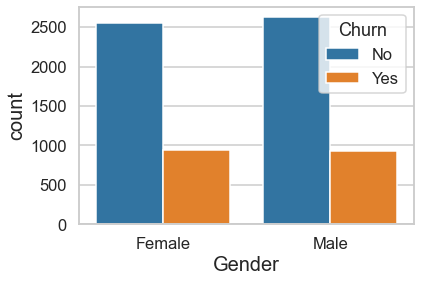

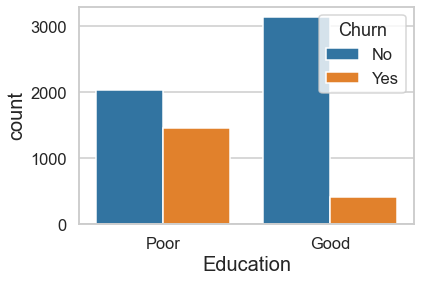

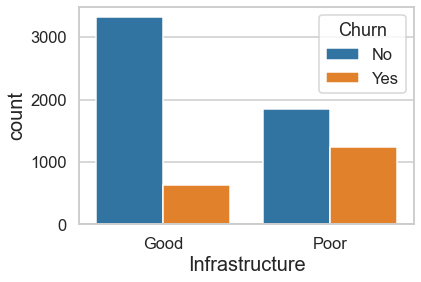

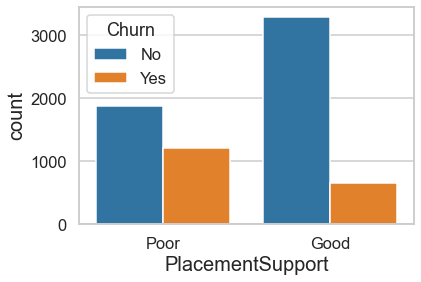

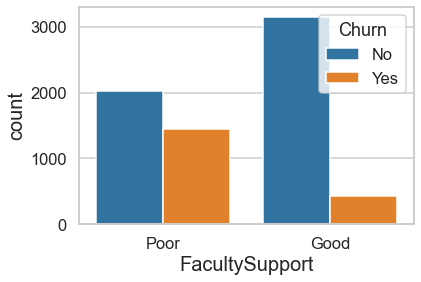

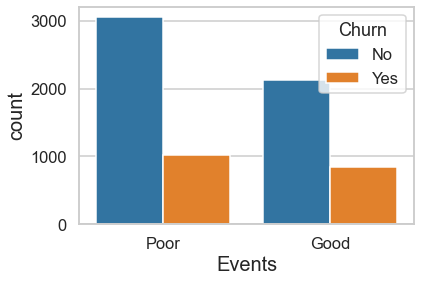

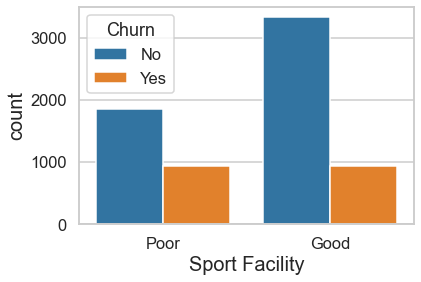

In [70]:
for i, predictor in enumerate(sd.drop(columns=['Churn', 'Fees', 'DegreeYears'])):
    plt.figure(i)
    sns.countplot(data=sd, x=predictor, hue='Churn')

Convert the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0

In [71]:
sd['Churn'] = np.where(sd.Churn == 'Yes',1,0)

In [72]:
sd.head()

,Gender,Education,Infrastructure,PlacementSupport,FacultySupport,Events,Fees,Sport Facility,DegreeYears,Churn
0,Female,Poor,Good,Poor,Poor,Poor,52885,Poor,4,0
1,Male,Good,Poor,Good,Poor,Poor,13000,Poor,4,0
2,Male,Good,Good,Poor,Poor,Poor,52885,Poor,4,1
3,Male,Good,Poor,Good,Good,Poor,13000,Poor,4,0
4,Female,Poor,Poor,Poor,Poor,Poor,52885,Poor,4,1


Convert all the categorical variables into dummy variables

In [73]:
sd_dummies = pd.get_dummies(sd)
sd_dummies.head()

,Fees,DegreeYears,Churn,Gender_Female,Gender_Male,Education_Good,Education_Poor,Infrastructure_Good,Infrastructure_Poor,PlacementSupport_Good,PlacementSupport_Poor,FacultySupport_Good,FacultySupport_Poor,Events_Good,Events_Poor,Sport Facility_Good,Sport Facility_Poor
0,52885,4,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1
1,13000,4,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1
2,52885,4,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1
3,13000,4,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1
4,52885,4,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1


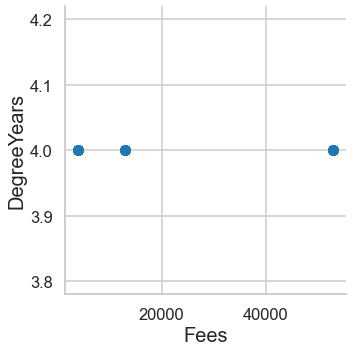

In [74]:
sns.lmplot(data=sd_dummies, x='Fees', y='DegreeYears', fit_reg=False)

Text(0.5, 1.0, 'Fees by churn')

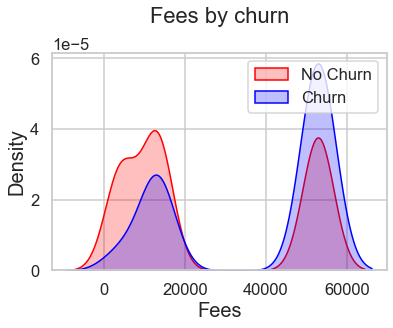

In [75]:
Mth = sns.kdeplot(sd_dummies.Fees[(sd_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(sd_dummies.Fees[(sd_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Fees')
Mth.set_title('Fees by churn')


Churn is high when Fees is high

Text(0.5, 1.0, 'Fees by churn')

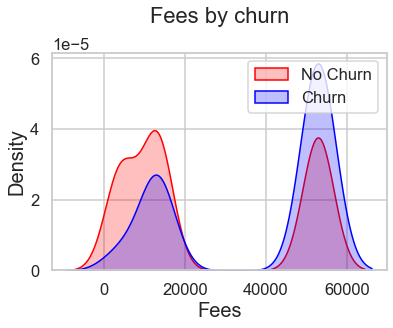

In [76]:
Tot = sns.kdeplot(sd_dummies.Fees[(sd_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(sd_dummies.Fees[(sd_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Fees')
Tot.set_title('Fees by churn')

higher Churn at higher Fees

Build a corelation of all predictors with 'Churn'

<AxesSubplot:>

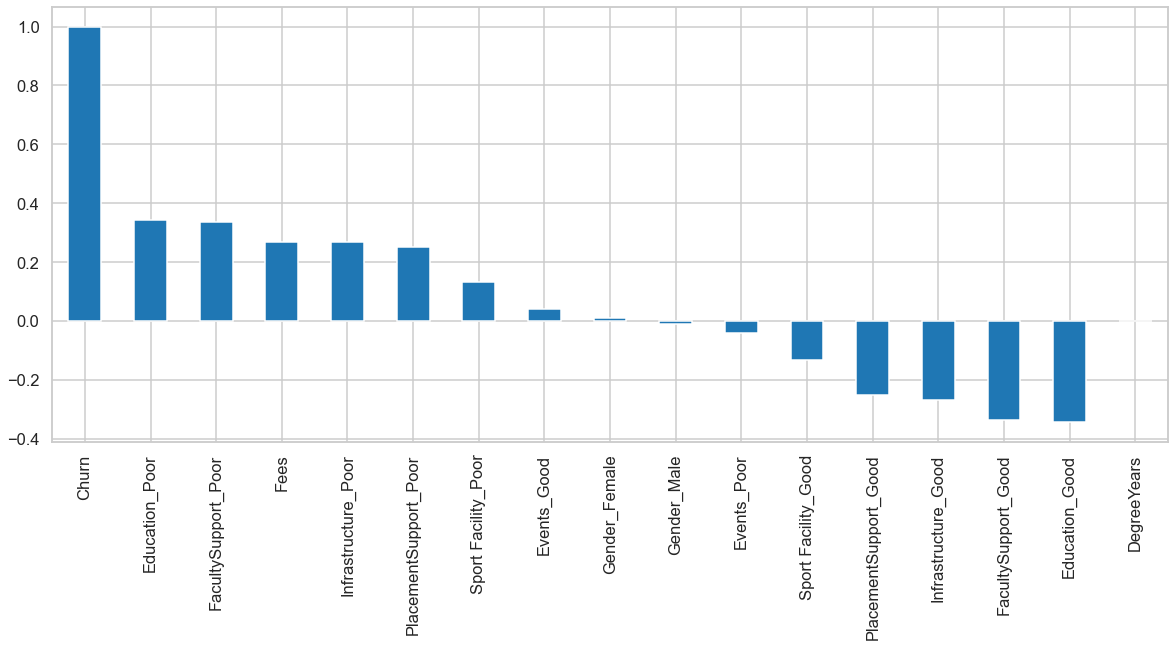

In [77]:
plt.figure(figsize=(20,8))
sd_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

This is also evident from the Heatmap below

<AxesSubplot:>

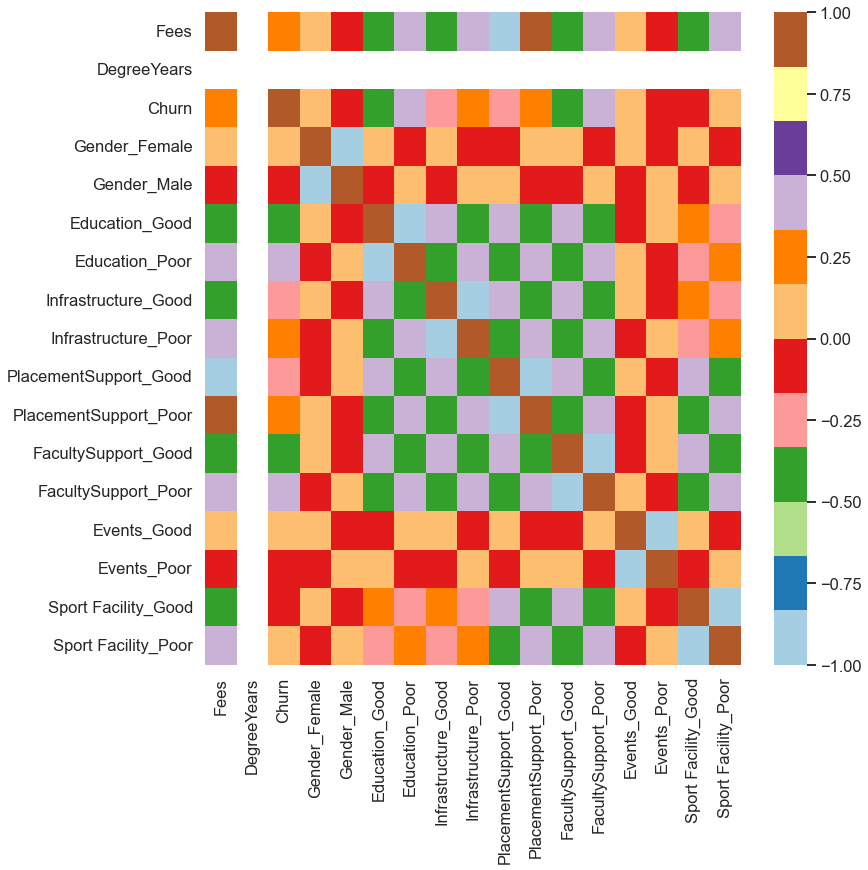

In [78]:
plt.figure(figsize=(12,12))
sns.heatmap(sd_dummies.corr(), cmap="Paired")

# Bivariate Analysis

In [79]:
new_df1_target0=sd.loc[sd["Churn"]==0]
new_df1_target1=sd.loc[sd["Churn"]==1]

In [80]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

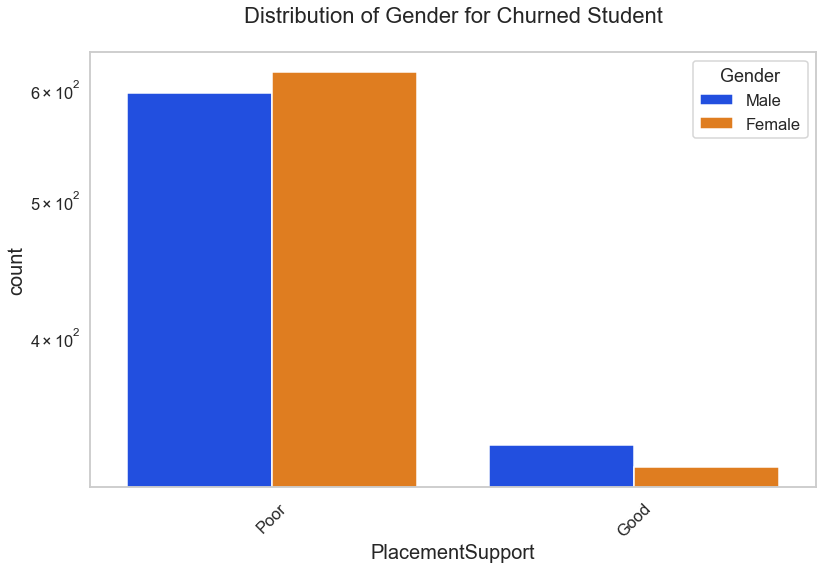

In [81]:
uniplot(new_df1_target1,col='PlacementSupport',title='Distribution of Gender for Churned Student',hue='Gender')

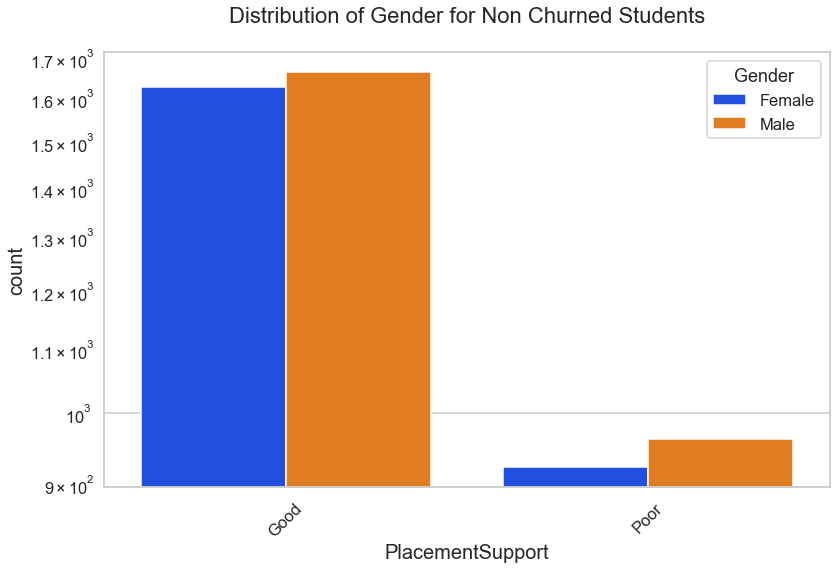

In [82]:
uniplot(new_df1_target0,col='PlacementSupport',title='Distribution of Gender for Non Churned Students',hue='Gender')

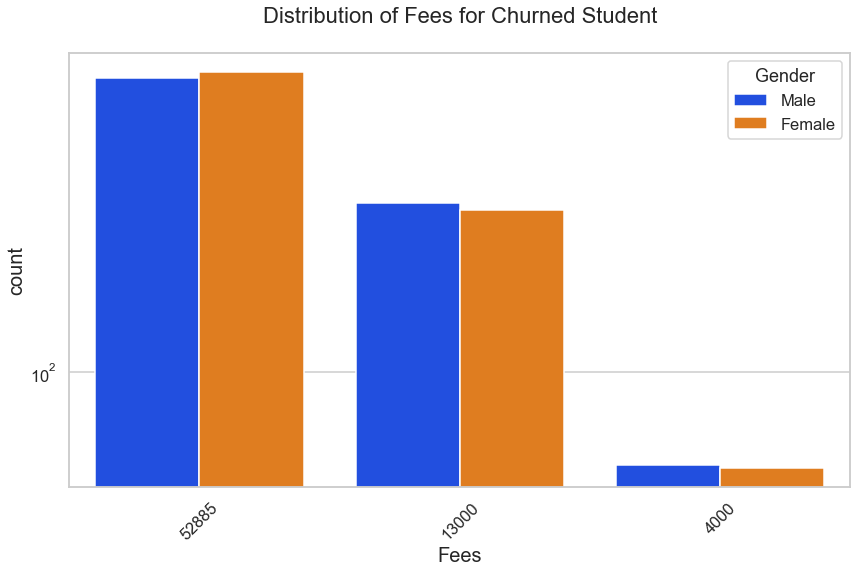

In [83]:
uniplot(new_df1_target1,col='Fees',title='Distribution of Fees for Churned Student',hue='Gender')

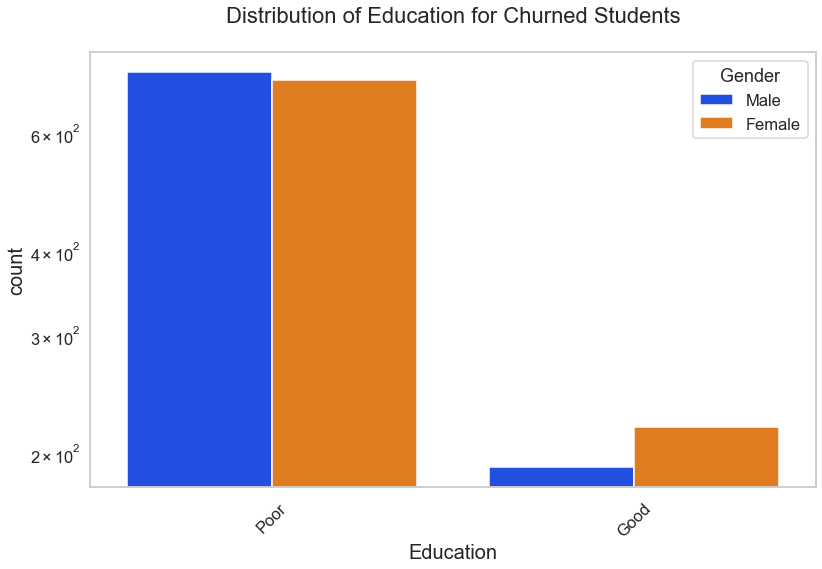

In [84]:
uniplot(new_df1_target1,col='Education',title='Distribution of Education for Churned Students',hue='Gender')

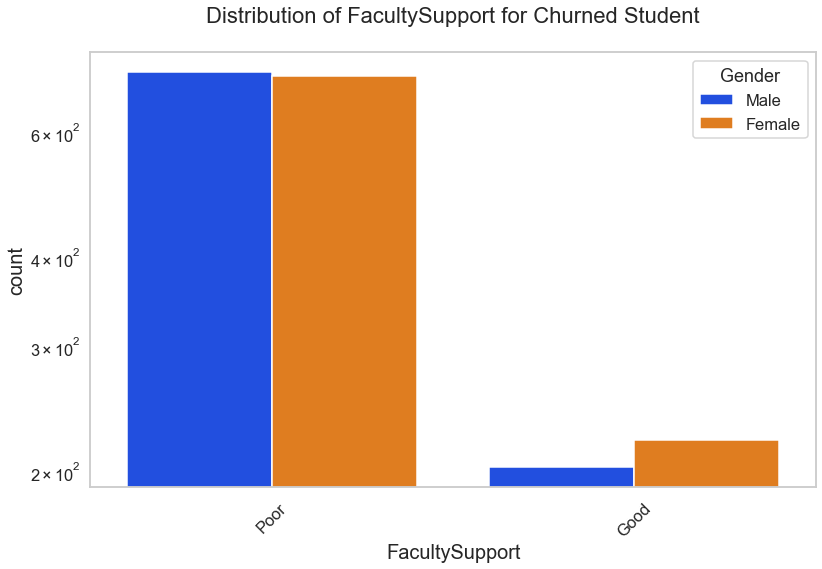

In [85]:
uniplot(new_df1_target1,col='FacultySupport',title='Distribution of FacultySupport for Churned Student',hue='Gender')

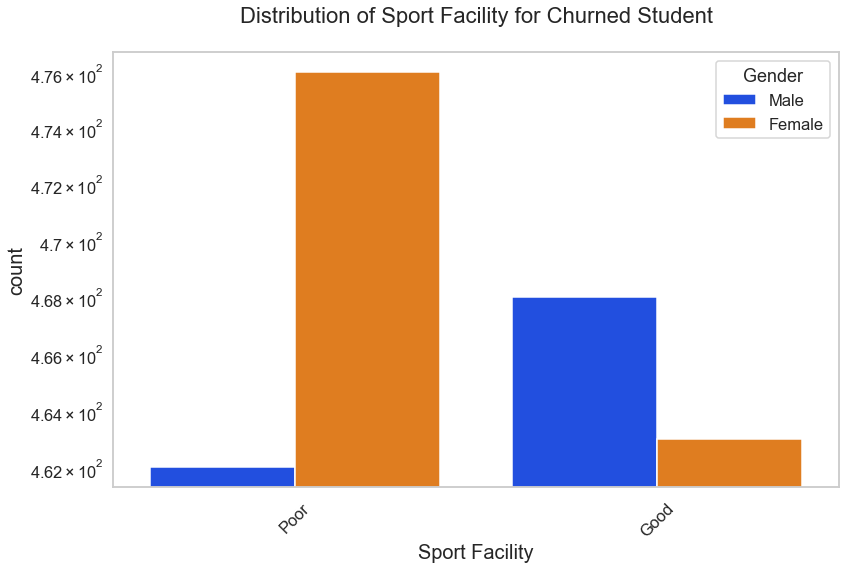

In [86]:
uniplot(new_df1_target1,col='Sport Facility',title='Distribution of Sport Facility for Churned Student',hue='Gender')

# CONCLUSION

1. Churn is high when Fees are high
2. Our Higher churners because of faculty support & Education

In [87]:
sd_dummies.to_csv('sd.csv')